In [91]:
import pandas as pd
import numpy as np

In [92]:
data=pd.read_csv(r"C:\Users\agata\Downloads\archive\possum.csv")

In [93]:
data=data.dropna()

In [94]:
data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [95]:
numericals = data.select_dtypes(include=np.number)
categoricals= data.select_dtypes(exclude=np.number)

In [96]:
cat_encoded = pd.get_dummies(categoricals)

In [97]:
final_df = pd.concat([numericals,cat_encoded],axis=1)

In [98]:
X = final_df.drop(columns="age")
y = final_df["age"]

In [105]:
X=X.drop(columns="case")

In [106]:
X

,site,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_Vic,Pop_other,sex_f,sex_m
0,1,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1,0,0,1
1,1,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1,0,1,0
2,1,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1,0,1,0
3,1,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1,0,1,0
4,1,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,0,1,0,1
100,7,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,0,1,0,1
101,7,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,0,1,1,0
102,7,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,0,1,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B9815BCC8>,
      dtype=object)

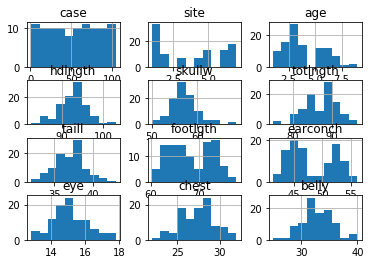

In [107]:
numericals.hist()

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
X_train_scaled

array([[ 1.38110434, -1.03275234, -0.94537623, ...,  0.83793058,
        -0.83793058,  0.83793058],
       [-1.16862675, -0.65786144, -0.78688901, ..., -1.19341628,
         1.19341628, -1.19341628],
       [-0.74367157, -0.60018592, -0.34312482, ..., -1.19341628,
        -0.83793058,  0.83793058],
       ...,
       [-1.16862675,  0.03424484,  0.19573171, ..., -1.19341628,
        -0.83793058,  0.83793058],
       [ 1.38110434,  0.58216231, -0.4065197 , ...,  0.83793058,
        -0.83793058,  0.83793058],
       [ 0.1062388 ,  2.97569654,  1.9707885 , ...,  0.83793058,
        -0.83793058,  0.83793058]])

In [116]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train=imp_mean.fit_transform(X_train)
X_test = imp_mean.fit_transform(X_test)

In [80]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
y_train_t=imp_mean.fit_transform(np.array(y_train_t).reshape(-1,1))
y_test_t = imp_mean.fit_transform(np.array(y_test_t).reshape(-1,1))

In [118]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression

In [125]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0.5)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.1508198627978916, Test -> 0.10972331644232791


In [123]:
model=LinearRegression()
model.fit(X_train_scaled, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

LinearRegression: Train -> -38.43883016072283, Test -> -25.820365513744257


In [132]:
model=Ridge(alpha=0.5)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.2919971001299583, Test -> -0.020095429277541488


In [133]:
model=ElasticNet(alpha=0.5)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

ElasticNet: Train -> 0.18410185711157923, Test -> 0.09572124744709587


In [150]:
def models(model):
    param_grid = { 'alpha' : [0, 0.5, 1, 0.8]}
    cv = GridSearchCV(model,
                  n_jobs=-1,
                  param_grid=param_grid,
                  cv=5,return_train_score=(True)
                 ).fit(X_train, y_train)
    cv.best_params_
    alpha=cv.best_params_["alpha"]

    model_=model(alpha=alpha)
    model_.fit(X_train, y_train)
    print(f"{model_.__class__.__name__}: Train -> {model_.score(X_train, y_train)}, Test -> {model_.score(X_test, y_test)}")
   

In [151]:
models(Lasso)

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

In [141]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'alpha' : [0, 0.5, 1, 0.8]}
cv = GridSearchCV(model,
                  n_jobs=-1,
                  param_grid=param_grid,
                  cv=5,return_train_score=(True)
                 ).fit(X_train, y_train)
cv.best_params_

{'alpha': 1}

In [143]:
cv.best_params_["alpha"]

1